Preprocesamiento

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the data from the CSV file
file_path = '/Users/victoria/Desktop/5tocuatrimestre/ml/tps/tp2ml/machineLearning/data/processed/toyota_dev_processed.csv'
data = np.genfromtxt(file_path, delimiter=',')
raw_data = np.genfromtxt('/Users/victoria/Desktop/5tocuatrimestre/ml/tps/tp2ml/machineLearning/data/raw/toyota_dev.csv', delimiter=',', skip_header=1, dtype=str)

vehicle_id_col = data[:, 0]            # Columna del ID del Vehículo
vehicle_type_cols = data[:, 1:4]       # Columnas del Tipo de Vehículo (3 columnas: 1, 2, 3)
year_col = data[:, 4]                  # Columna del Año de Fabricación (columna 4)
fuel_type_cols = data[:, 5:10]         # Columnas para el Tipo de Combustible (5 columnas: 5, 6, 7, 8, 9)
transmission_cols = data[:, 10:13]     # Columnas para la Transmisión (3 columnas: 10, 11, 12)
motor_col = data[:, 13]                # Columna del Motor (columna 13)
kilometers_col = data[:, 14]           # Columna de Kilómetros Recorridos (columna 14)
seller_type_cols = data[:, 15:18]      # Columnas para el Tipo de Vendedor (3 columnas: 15, 16, 17)
price_col = data[:, 18]                # Columna del Precio (columna 18)




Ejercicio 1

A

1. 

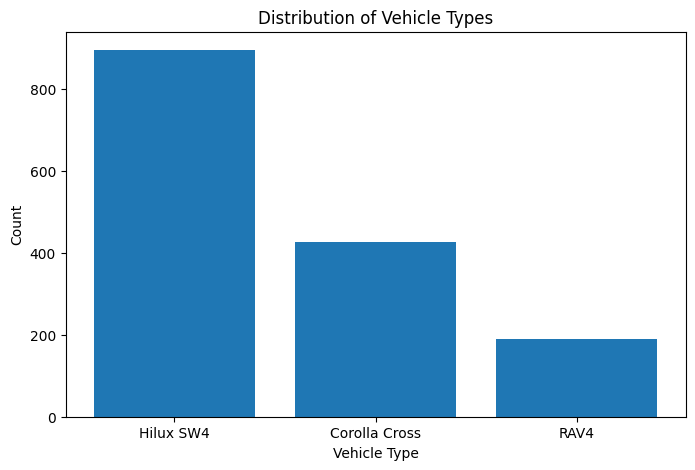

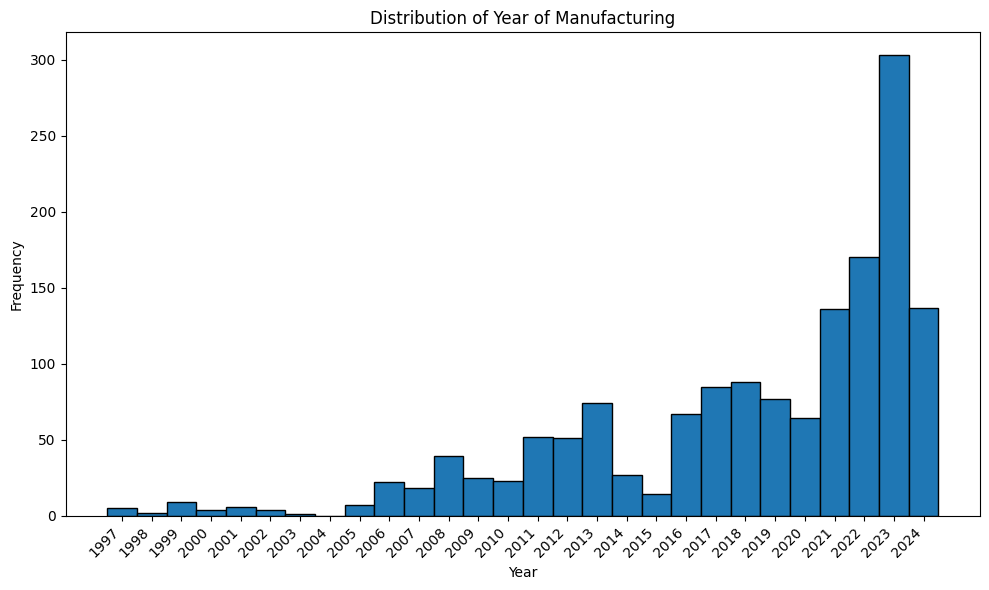

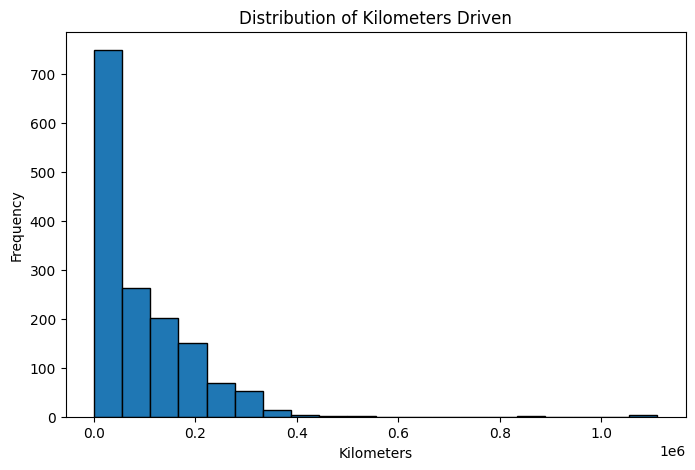

In [12]:
def generate_histograms(data):
    # Vehicle Types (assuming they are one-hot encoded in columns 1:4)
    vehicle_type_cols = data[:, 1:4]
    vehicle_type_sums = np.sum(vehicle_type_cols, axis=0)
    
    # Year of Manufacturing (assuming it's in column 4)
    year_col = data[:, 4].astype(float)
    
    # Kilometers Driven (assuming it's in column 14)
    kilometers_col = data[:, 14].astype(float)
    
    # 1. Histogram for Vehicle Types
    plt.figure(figsize=(8, 5))
    plt.bar(['Hilux SW4', 'Corolla Cross', 'RAV4'], vehicle_type_sums)
    plt.title('Distribution of Vehicle Types')
    plt.xlabel('Vehicle Type')
    plt.ylabel('Count')
    plt.show()
    
    # 2. Histogram for Year of Manufacturing
    plt.figure(figsize=(10, 6))

    # Define the range of years (you can customize this range based on your data)
    min_year = int(min(year_col))  # Minimum year in the data
    max_year = int(max(year_col))  # Maximum year in the data

    # Create bins for each individual year
    bins = np.arange(min_year, max_year + 2)  # One bin for each year

    # Plot the histogram
    plt.hist(year_col, bins=bins, edgecolor='black', align='left')
    plt.title('Distribution of Year of Manufacturing')
    plt.xlabel('Year')
    plt.ylabel('Frequency')

    # Rotate x-tick labels for readability
    plt.xticks(np.arange(min_year, max_year + 1, step=1), rotation=45, ha='right')

    plt.tight_layout()  # Adjust the layout to prevent clipping of tick labels
    plt.show()

    # 3. Histogram for Kilometers Driven
    plt.figure(figsize=(8, 5))
    plt.hist(kilometers_col, bins=20, edgecolor='black')
    plt.title('Distribution of Kilometers Driven')
    plt.xlabel('Kilometers')
    plt.ylabel('Frequency')
    plt.show()

# Call the function with the preprocessed data
generate_histograms(data)


2. 

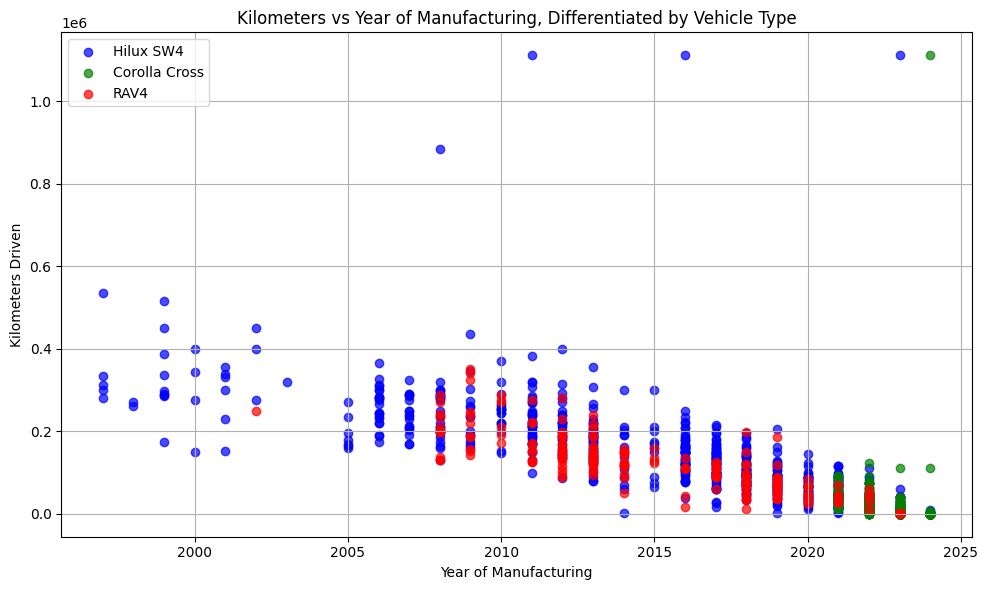

In [14]:
def scatter_plot_vehicle_type(data):
    # Assuming the columns are as follows based on your previous structure:
    # - Year (column 4)
    # - Kilometers (column 14)
    # - Vehicle Type (one-hot encoded in columns 1:4)
    
    # Extract columns
    year_col = data[:, 4].astype(float)         # Year of manufacturing
    kilometers_col = data[:, 14].astype(float)  # Kilometers driven
    vehicle_type_cols = data[:, 1:4]            # One-hot encoded vehicle types (Hilux SW4, Corolla Cross, RAV4)

    # Separate data by vehicle type
    hilux_mask = vehicle_type_cols[:, 0] == 1  # Hilux SW4
    corolla_mask = vehicle_type_cols[:, 1] == 1  # Corolla Cross
    rav4_mask = vehicle_type_cols[:, 2] == 1  # RAV4

    # Create scatter plot
    plt.figure(figsize=(10, 6))

    # Scatter for Hilux SW4
    plt.scatter(year_col[hilux_mask], kilometers_col[hilux_mask], color='blue', label='Hilux SW4', alpha=0.7)

    # Scatter for Corolla Cross
    plt.scatter(year_col[corolla_mask], kilometers_col[corolla_mask], color='green', label='Corolla Cross', alpha=0.7)

    # Scatter for RAV4
    plt.scatter(year_col[rav4_mask], kilometers_col[rav4_mask], color='red', label='RAV4', alpha=0.7)

    # Adding plot labels and legend
    plt.title('Kilometers vs Year of Manufacturing, Differentiated by Vehicle Type')
    plt.xlabel('Year of Manufacturing')
    plt.ylabel('Kilometers Driven')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function with your preprocessed data
scatter_plot_vehicle_type(data)


3. 

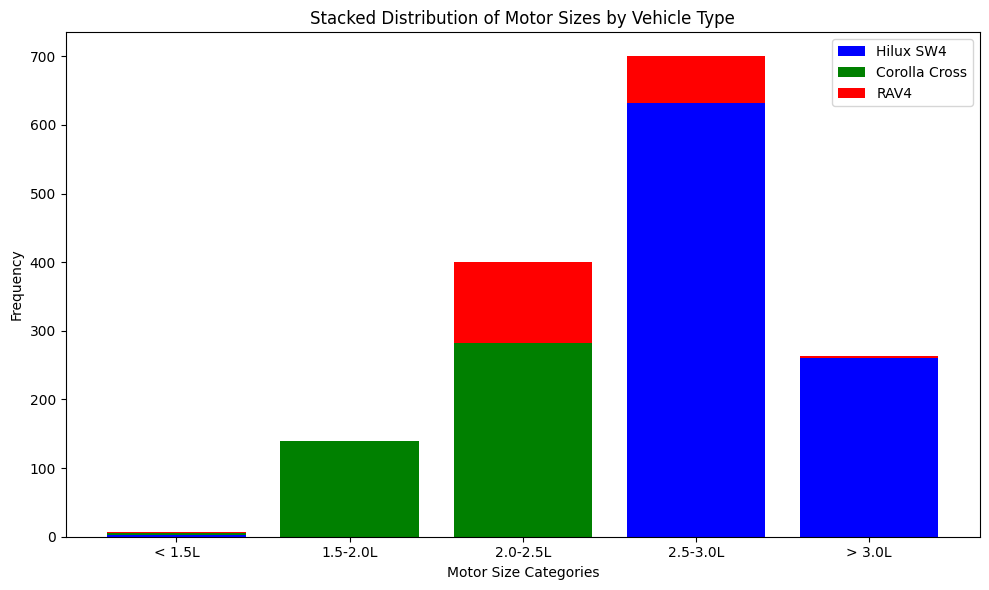

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def stacked_bar_motor_distribution(data):
    # Assuming columns:
    # - Motor (column 13)
    # - Vehicle Type (one-hot encoded in columns 1:4)
    
    # Extract columns
    motor_col = data[:, 13].astype(float)  # Motor column
    vehicle_type_cols = data[:, 1:4]       # One-hot encoded vehicle types (Hilux SW4, Corolla Cross, RAV4)

    # Separate data by vehicle type
    hilux_mask = vehicle_type_cols[:, 0] == 1  # Hilux SW4
    corolla_mask = vehicle_type_cols[:, 1] == 1  # Corolla Cross
    rav4_mask = vehicle_type_cols[:, 2] == 1  # RAV4

    # Define bins for motor sizes
    motor_bins = [0, 1.5, 2.0, 2.5, 3.0, np.inf]  # Bins to include everything larger than 3.0L
    motor_labels = ['< 1.5L', '1.5-2.0L', '2.0-2.5L', '2.5-3.0L', '> 3.0L']

    # Bin the motor values
    motor_binned_hilux = np.digitize(motor_col[hilux_mask], motor_bins) - 1
    motor_binned_corolla = np.digitize(motor_col[corolla_mask], motor_bins) - 1
    motor_binned_rav4 = np.digitize(motor_col[rav4_mask], motor_bins) - 1

    # Count occurrences in each bin
    hilux_counts = np.bincount(motor_binned_hilux, minlength=len(motor_labels))
    corolla_counts = np.bincount(motor_binned_corolla, minlength=len(motor_labels))
    rav4_counts = np.bincount(motor_binned_rav4, minlength=len(motor_labels))

    # Stacked bar chart
    plt.figure(figsize=(10, 6))
    
    # Plot stacked bars
    plt.bar(motor_labels, hilux_counts, label='Hilux SW4', color='blue')
    plt.bar(motor_labels, corolla_counts, bottom=hilux_counts, label='Corolla Cross', color='green')
    plt.bar(motor_labels, rav4_counts, bottom=hilux_counts + corolla_counts, label='RAV4', color='red')

    # Add labels and legend
    plt.xlabel('Motor Size Categories')
    plt.ylabel('Frequency')
    plt.title('Stacked Distribution of Motor Sizes by Vehicle Type')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Call the function with your preprocessed data
stacked_bar_motor_distribution(data)


4. 

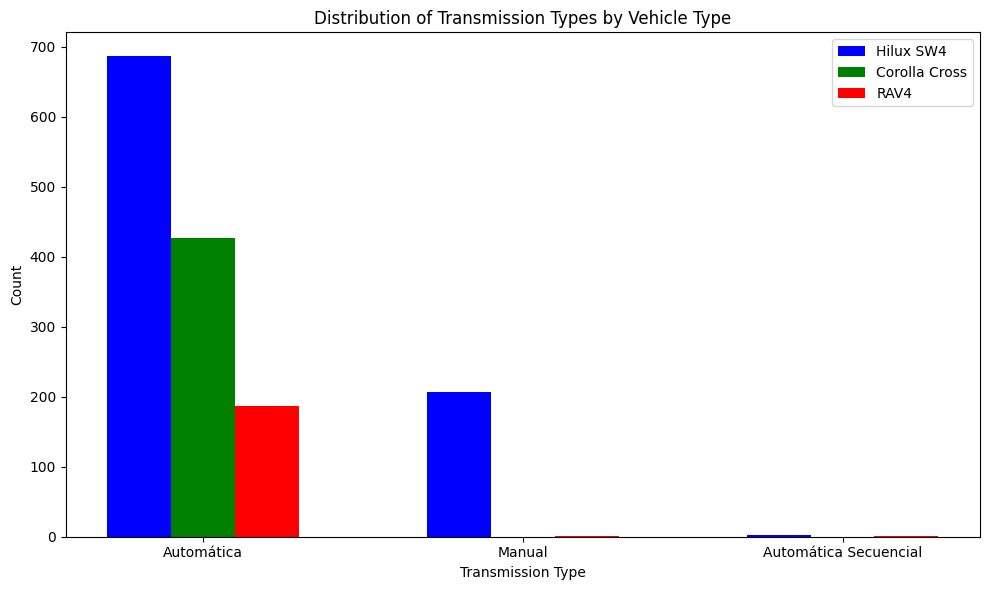

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def compare_transmission_distribution(data):
    # Assuming columns:
    # - Transmission (one-hot encoded in columns 10:13)
    # - Vehicle Type (one-hot encoded in columns 1:4)
    
    # Extract columns
    transmission_cols = data[:, 10:13]   # One-hot encoded transmission types
    vehicle_type_cols = data[:, 1:4]     # One-hot encoded vehicle types (Hilux SW4, Corolla Cross, RAV4)

    # Separate data by vehicle type
    hilux_mask = vehicle_type_cols[:, 0] == 1  # Hilux SW4
    corolla_mask = vehicle_type_cols[:, 1] == 1  # Corolla Cross
    rav4_mask = vehicle_type_cols[:, 2] == 1  # RAV4

    # Count transmission types for each vehicle type
    hilux_transmission = np.sum(transmission_cols[hilux_mask], axis=0)
    corolla_transmission = np.sum(transmission_cols[corolla_mask], axis=0)
    rav4_transmission = np.sum(transmission_cols[rav4_mask], axis=0)

    # Labels for transmission types
    transmission_labels = ['Automática', 'Manual', 'Automática Secuencial']

    # Create grouped bar chart
    bar_width = 0.2
    index = np.arange(len(transmission_labels))

    plt.figure(figsize=(10, 6))

    # Hilux SW4 bars
    plt.bar(index, hilux_transmission, bar_width, label='Hilux SW4', color='blue')

    # Corolla Cross bars (shifted by bar_width)
    plt.bar(index + bar_width, corolla_transmission, bar_width, label='Corolla Cross', color='green')

    # RAV4 bars (shifted by 2 * bar_width)
    plt.bar(index + 2 * bar_width, rav4_transmission, bar_width, label='RAV4', color='red')

    # Adding labels and legend
    plt.xlabel('Transmission Type')
    plt.ylabel('Count')
    plt.title('Distribution of Transmission Types by Vehicle Type')
    plt.xticks(index + bar_width, transmission_labels)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Call the function with your preprocessed data
compare_transmission_distribution(data)


5. 

La variable "Color" se eliminó del conjunto de datos debido a un alto porcentaje de valores faltantes. Con datos incompletos, analizar la distribución de los colores podría generar conclusiones sesgadas o inexactas. Sin embargo, para completar el análisis, se utilizaron las filas disponibles de los datos antes del preprocesamiento que sí contienen información sobre los colores para proporcionar algunos insights basados en ese subconjunto.

Al analizar los datos con la información de color disponible, se observó que los colores más comunes son Gris, Blanco, y Negro, especialmente en el modelo Hilux SW4. Además, el Corolla Cross muestra una distribución equilibrada entre varios colores, mientras que el RAV4 tiene una representación menor en general para todos los colores. Los colores menos frecuentes, como Marrón, Rojo, Gris Oscuro, y Azul, aparecen en cantidades mucho menores.










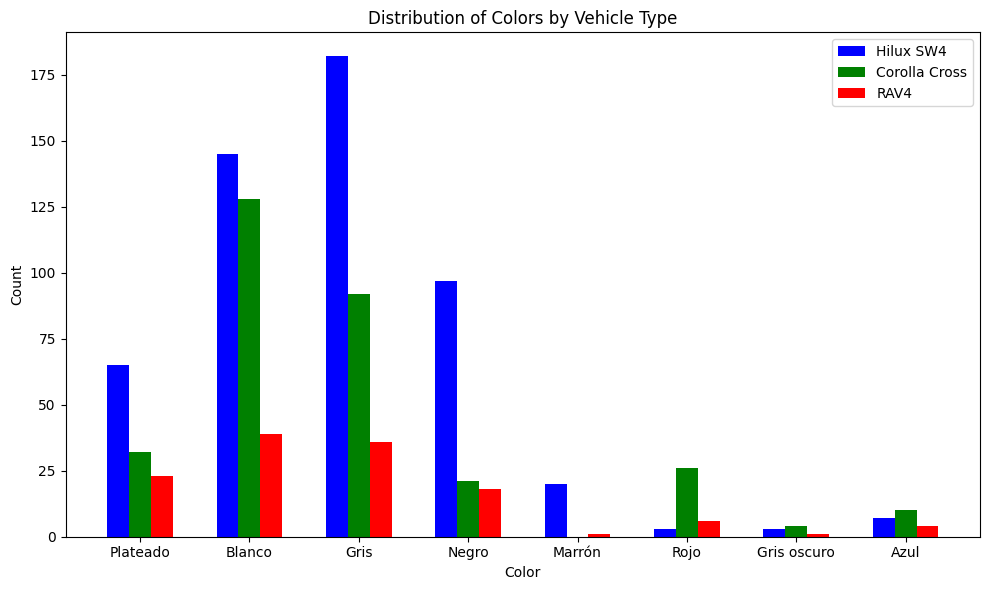

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def compare_color_distribution(data):
    color_categories = ['Plateado', 'Blanco', 'Gris', 'Negro', 'Marrón', 'Rojo', 'Gris oscuro', 'Azul']
    
    color_col = data[:, 3]  # Color column
    vehicle_type_col = data[:, 1]  # Vehicle type column

    hilux_mask = vehicle_type_col == 'Hilux SW4'
    corolla_mask = vehicle_type_col == 'Corolla Cross'
    rav4_mask = vehicle_type_col == 'RAV4'

    hilux_colors = [np.sum(color_col[hilux_mask] == color) for color in color_categories]
    corolla_colors = [np.sum(color_col[corolla_mask] == color) for color in color_categories]
    rav4_colors = [np.sum(color_col[rav4_mask] == color) for color in color_categories]

    bar_width = 0.2
    index = np.arange(len(color_categories))

    plt.figure(figsize=(10, 6))

    plt.bar(index, hilux_colors, bar_width, label='Hilux SW4', color='blue')

    plt.bar(index + bar_width, corolla_colors, bar_width, label='Corolla Cross', color='green')

    plt.bar(index + 2 * bar_width, rav4_colors, bar_width, label='RAV4', color='red')

    plt.xlabel('Color')
    plt.ylabel('Count')
    plt.title('Distribution of Colors by Vehicle Type')
    plt.xticks(index + bar_width, color_categories)
    plt.legend()
    plt.tight_layout()
    plt.show()

compare_color_distribution(raw_data)


B

1.

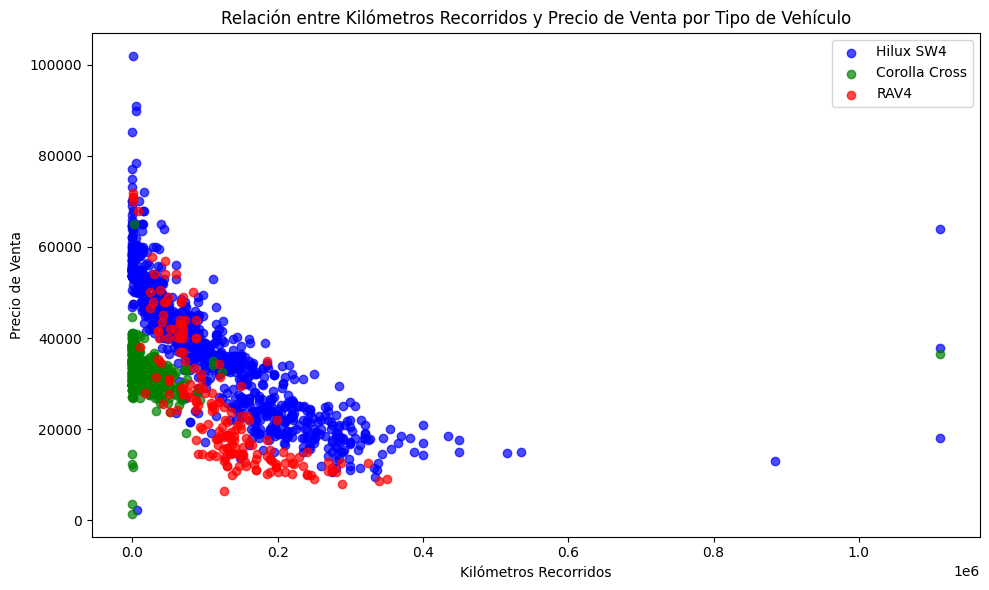

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_price_vs_kilometers(data):
    # Asignar las columnas relevantes
    kilometers_col = data[:, 14].astype(float)  # Columna de Kilómetros Recorridos
    price_col = data[:, 18].astype(float)       # Columna del Precio
    vehicle_type_cols = data[:, 1:4]            # Columnas del Tipo de Vehículo (Hilux SW4, Corolla Cross, RAV4)

    # Máscaras para los tipos de vehículos (basado en one-hot encoding)
    hilux_mask = vehicle_type_cols[:, 0] == 1  # Hilux SW4
    corolla_mask = vehicle_type_cols[:, 1] == 1  # Corolla Cross
    rav4_mask = vehicle_type_cols[:, 2] == 1  # RAV4

    # Crear el gráfico de dispersión
    plt.figure(figsize=(10, 6))

    # Dibujar los datos de cada tipo de vehículo
    plt.scatter(kilometers_col[hilux_mask], price_col[hilux_mask], label='Hilux SW4', color='blue', alpha=0.7)
    plt.scatter(kilometers_col[corolla_mask], price_col[corolla_mask], label='Corolla Cross', color='green', alpha=0.7)
    plt.scatter(kilometers_col[rav4_mask], price_col[rav4_mask], label='RAV4', color='red', alpha=0.7)

    # Etiquetas y leyenda
    plt.xlabel('Kilómetros Recorridos')
    plt.ylabel('Precio de Venta')
    plt.title('Relación entre Kilómetros Recorridos y Precio de Venta por Tipo de Vehículo')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Cargar el dataset procesado y ejecutar la función
plot_price_vs_kilometers(data)


El análisis demuestra que la Hilux SW4 mantiene un valor más alto en el mercado, incluso con mayor kilometraje, mientras que los Corolla Cross y RAV4 pierden valor de forma más pronunciada a medida que aumenta el kilometraje.


2.

/var/folders/cd/3txhv68d0498qdntmvvxsxpc0000gn/T/ipykernel_13163/741004278.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([hilux_prices, corolla_prices, rav4_prices], labels=['Hilux SW4', 'Corolla Cross', 'RAV4'], showfliers=True)


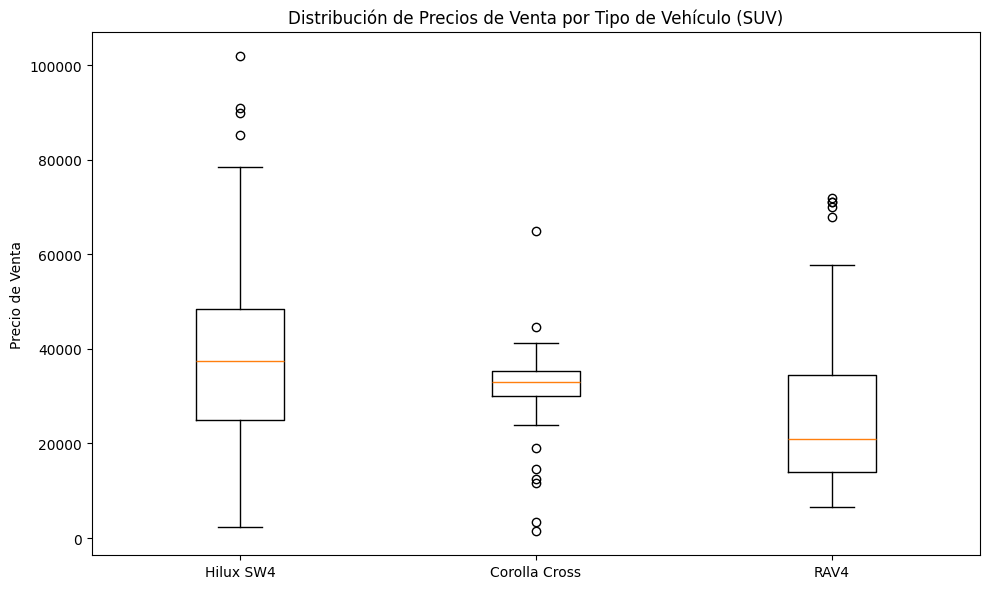

In [48]:
import matplotlib.pyplot as plt
import numpy as np

def plot_price_distribution_by_vehicle_type(data):

    hilux_mask = vehicle_type_cols[:, 0] == 1  
    corolla_mask = vehicle_type_cols[:, 1] == 1 
    rav4_mask = vehicle_type_cols[:, 2] == 1 

    hilux_prices = price_col[hilux_mask]
    corolla_prices = price_col[corolla_mask]
    rav4_prices = price_col[rav4_mask]

    plt.figure(figsize=(10, 6))
    plt.boxplot([hilux_prices, corolla_prices, rav4_prices], labels=['Hilux SW4', 'Corolla Cross', 'RAV4'], showfliers=True)

    plt.ylabel('Precio de Venta')
    plt.title('Distribución de Precios de Venta por Tipo de Vehículo (SUV)')
    plt.tight_layout()
    plt.show()

plot_price_distribution_by_vehicle_type(data)


La Hilux SW4 tiene una mayor variabilidad en los precios y presenta al menos un outlier en la parte superior. La Corolla Cross tiene la menor variabilidad en precios, pero con varios outliers en ambos extremos, lo que sugiere que hay vehículos con precios significativamente más bajos o más altos de lo normal. La RAV4 muestra una variabilidad considerable y outliers en la parte superior.


3. 

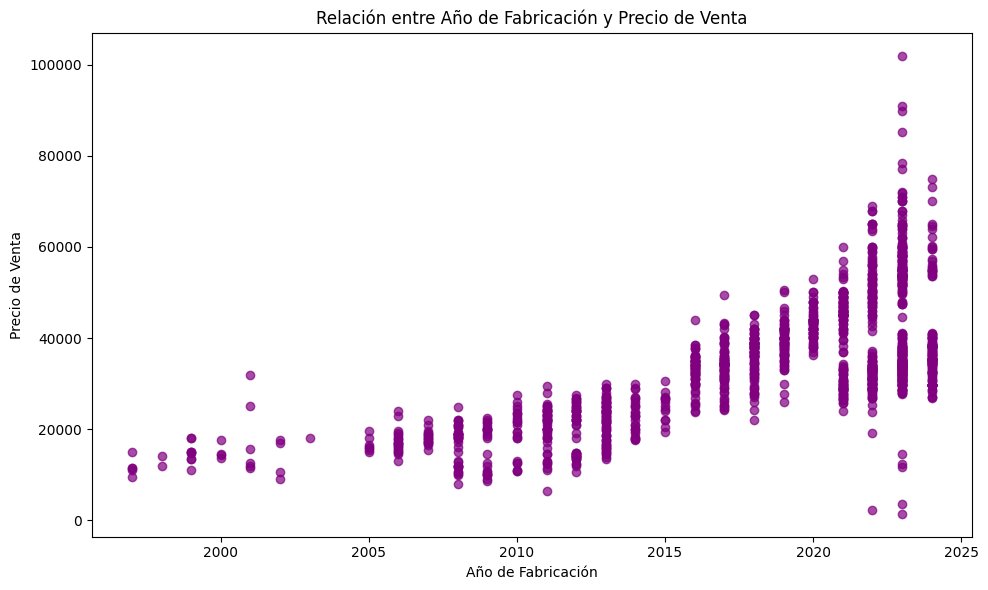

In [49]:
import matplotlib.pyplot as plt
import numpy as np

def plot_price_vs_year(data):

    plt.figure(figsize=(10, 6))

    plt.scatter(year_col, price_col, color='purple', alpha=0.7)

    plt.xlabel('Año de Fabricación')
    plt.ylabel('Precio de Venta')
    plt.title('Relación entre Año de Fabricación y Precio de Venta')
    plt.tight_layout()
    plt.show()

plot_price_vs_year(data)


El análisis muestra una relación clara entre el año de fabricación y el precio de venta. Los vehículos más nuevos tienden a ser más caros, aunque hay variabilidad en los precios dentro de los mismos años, lo que puede deberse a diferencias en el modelo, kilometraje, estado del vehículo o versiones especiales.






4. 

La variable "Color" fue eliminada del conjunto de datos debido a un alto porcentaje de valores faltantes, lo que afectaba su utilidad en el análisis predictivo. Aunque es posible que el color influya en la preferencia de los compradores, no se disponía de suficientes datos para realizar un análisis estadísticamente válido. Además, los datos disponibles no mostraban una diferencia significativa en los precios de venta basada en el color del vehículo. Por lo tanto, se consideró que esta variable no aportaría valor en la construcción de los modelos predictivos, y se decidió eliminarla.






5. 

/var/folders/cd/3txhv68d0498qdntmvvxsxpc0000gn/T/ipykernel_13163/1437730084.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(prices_by_fuel_type, labels=fuel_types, showfliers=True)


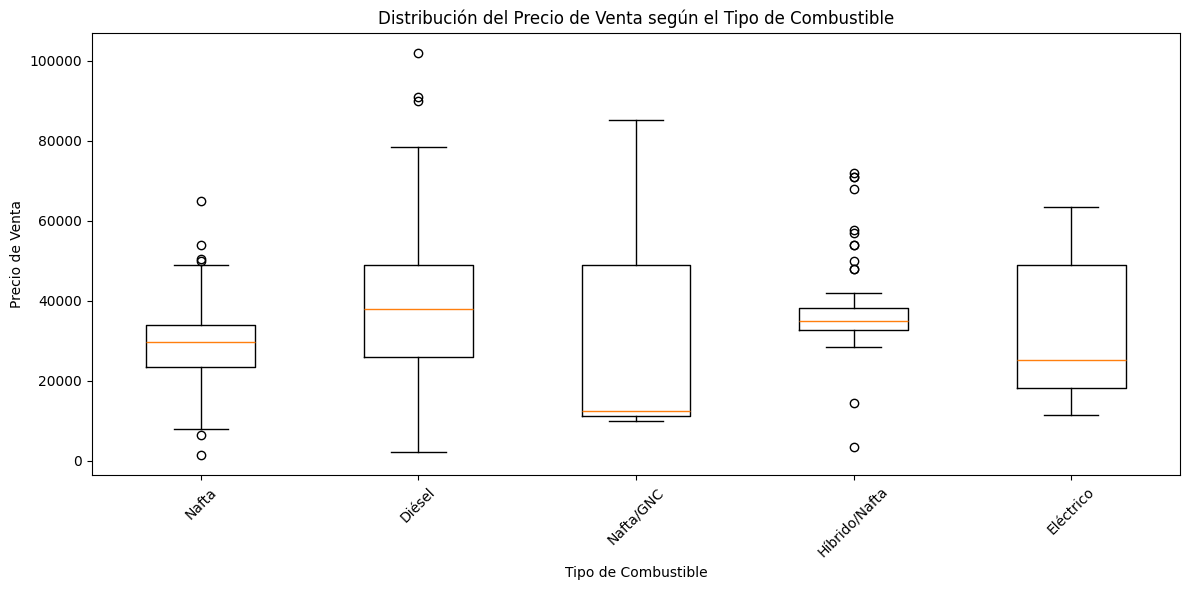

In [51]:
import matplotlib.pyplot as plt
import numpy as np

def plot_price_by_fuel_type(data):
    hilux_mask = vehicle_type_cols[:, 0] == 1
    corolla_mask = vehicle_type_cols[:, 1] == 1
    rav4_mask = vehicle_type_cols[:, 2] == 1

    fuel_types = ['Nafta', 'Diésel', 'Nafta/GNC', 'Híbrido/Nafta', 'Eléctrico']
    
    prices_by_fuel_type = []

    for i in range(fuel_type_cols.shape[1]):
        fuel_prices = price_col[fuel_type_cols[:, i] == 1]
        prices_by_fuel_type.append(fuel_prices)
    
    plt.figure(figsize=(12, 6))

    plt.boxplot(prices_by_fuel_type, labels=fuel_types, showfliers=True)

    plt.xlabel('Tipo de Combustible')
    plt.ylabel('Precio de Venta')
    plt.title('Distribución del Precio de Venta según el Tipo de Combustible')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_price_by_fuel_type(data)


El tipo de combustible parece tener un impacto en el precio de venta, especialmente en los vehículos Diésel, que tienden a tener precios más altos.
Los vehículos Eléctricos y Híbridos también presentan precios más elevados, pero con menor dispersión, lo que sugiere que el mercado está en transición hacia estos tipos de combustible.
Se identifican outliers en varias categorías, especialmente en los vehículos Diésel y Nafta.





6. 

/var/folders/cd/3txhv68d0498qdntmvvxsxpc0000gn/T/ipykernel_42537/1173256677.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(prices_by_transmission, labels=transmission_types, showfliers=True)


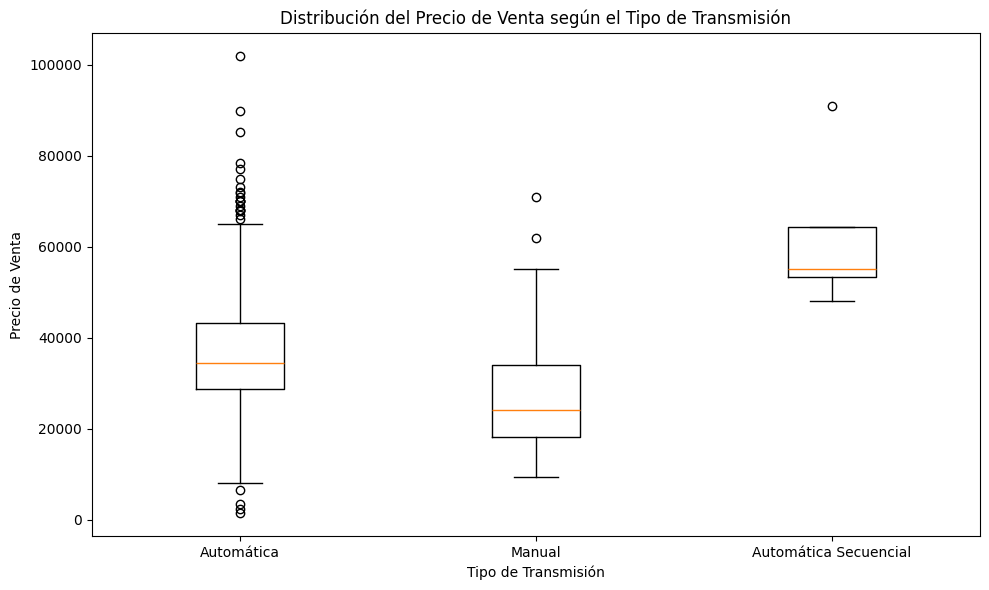

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_price_by_transmission_type(data):
    
    # Etiquetas de los tipos de transmisión
    transmission_types = ['Automática', 'Manual', 'Automática Secuencial']
    
    # Crear listas para los precios por tipo de transmisión
    prices_by_transmission = []

    # Para cada tipo de transmisión, agregar los precios
    for i in range(transmission_cols.shape[1]):
        transmission_prices = price_col[transmission_cols[:, i] == 1]
        prices_by_transmission.append(transmission_prices)
    
    plt.figure(figsize=(10, 6))

    # Crear un boxplot para los precios por tipo de transmisión
    plt.boxplot(prices_by_transmission, labels=transmission_types, showfliers=True)

    # Añadir etiquetas y título
    plt.xlabel('Tipo de Transmisión')
    plt.ylabel('Precio de Venta')
    plt.title('Distribución del Precio de Venta según el Tipo de Transmisión')
    plt.tight_layout()
    plt.show()

# Llamar a la función con los datos preprocesados
plot_price_by_transmission_type(data)


El gráfico de cajas que compara la distribución de precios de venta por tipo de transmisión muestra diferencias notables en los precios según la categoría de transmisión. Los vehículos con transmisión automática presentan una mayor dispersión en los precios, con algunos outliers que indican modelos significativamente más costosos, lo que puede deberse a los kilometrajes del vehículo. La transmisión manual, por su parte, muestra una distribución más compacta y precios más bajos en general, lo que es típico de vehículos más asequibles o antiguos. Los vehículos con transmisión automática secuencial también exhiben una menor dispersión de precios, aunque algunos modelos pueden mostrar precios elevados. La transmisión secuencial parece estar asociada con precios más altos, mientras que los vehículos automáticos muestran mayor variabilidad en el mercado debido a la inclusión de modelos más caros.








7. 

/var/folders/cd/3txhv68d0498qdntmvvxsxpc0000gn/T/ipykernel_13163/3092364274.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(prices_by_seller, labels=seller_types, showfliers=True)


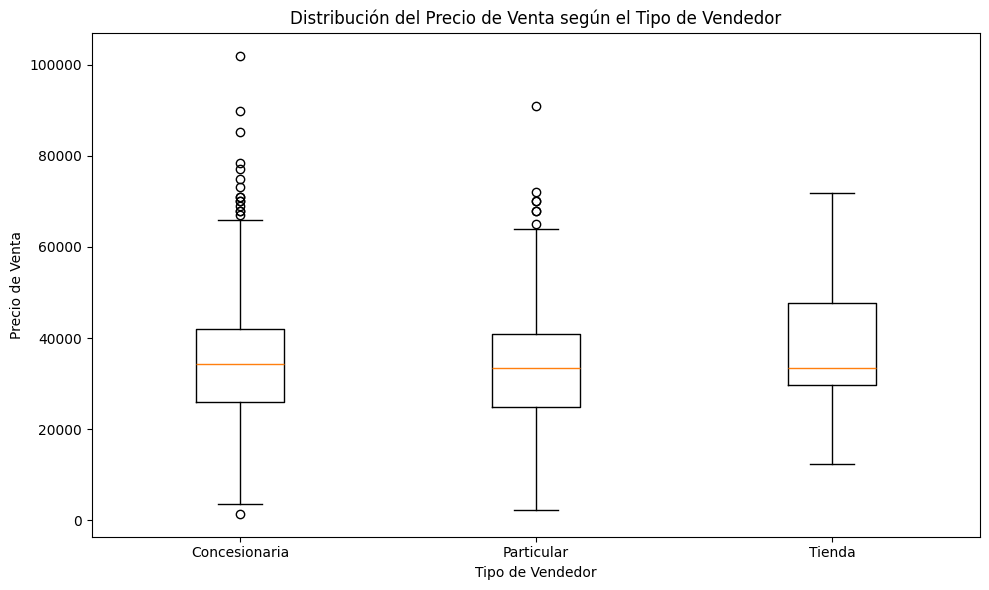

In [54]:
import matplotlib.pyplot as plt

def plot_price_by_seller_type(data):
    
    # Etiquetas de los tipos de vendedor
    seller_types = ['Concesionaria', 'Particular', 'Tienda']
    
    # Crear listas para los precios por tipo de vendedor
    prices_by_seller = []

    # Para cada tipo de vendedor, agregar los precios
    for i in range(seller_type_cols.shape[1]):
        seller_prices = price_col[seller_type_cols[:, i] == 1]
        prices_by_seller.append(seller_prices)
    
    plt.figure(figsize=(10, 6))

    # Crear un boxplot para los precios por tipo de vendedor
    plt.boxplot(prices_by_seller, labels=seller_types, showfliers=True)

    # Añadir etiquetas y título
    plt.xlabel('Tipo de Vendedor')
    plt.ylabel('Precio de Venta')
    plt.title('Distribución del Precio de Venta según el Tipo de Vendedor')
    plt.tight_layout()
    plt.show()

# Llamar a la función con los datos preprocesados
plot_price_by_seller_type(data)


El gráfico de cajas que compara la distribución de precios de venta según el tipo de vendedor revela algunas tendencias claras. Los vehículos vendidos por concesionarias tienen una mediana de precios más alta y una mayor dispersión de los precios, lo que sugiere que suelen vender vehículos en mejor estado o más nuevos. Además, hay varios outliers en la parte superior que indican la presencia de vehículos más caros.

Por otro lado, los vehículos vendidos por particulares muestran una mediana más baja y una mayor cantidad de outliers, lo que indica que, aunque en promedio los precios son menores, algunos vehículos pueden estar inflados en cuanto a precio o ser mas nuevos.

Finalmente, los vehículos vendidos por tiendas presentan una distribución intermedia, con menos dispersión en los precios y una mediana más baja que las concesionarias, pero similar a los particulares.


8. 

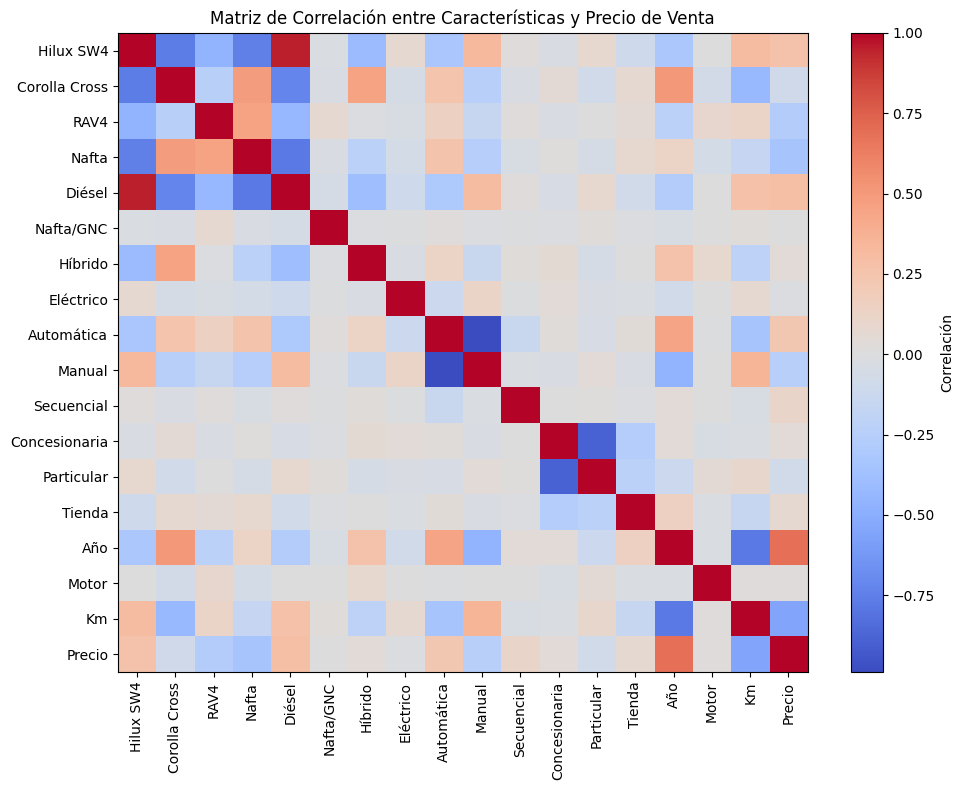

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_correlation_matrix(data):
    selected_columns = np.hstack([
        data[:, 1:4],       
        data[:, 5:10],      
        data[:, 10:13],    
        data[:, 15:18],    
        data[:, [4, 13, 14, 18]].astype(float)  
    ])

    correlation_matrix = np.corrcoef(selected_columns, rowvar=False)
    
    # print("Matriz de Correlación:")
    # print(correlation_matrix)

    labels = [
        'Hilux SW4', 'Corolla Cross', 'RAV4',      
        'Nafta', 'Diésel', 'Nafta/GNC', 'Híbrido', 'Eléctrico', 
        'Automática', 'Manual', 'Secuencial',       
        'Concesionaria', 'Particular', 'Tienda',      
        'Año', 'Motor', 'Km', 'Precio'               
    ]
    
    plt.figure(figsize=(10, 8))
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
    plt.colorbar(label='Correlación')
    plt.xticks(np.arange(len(labels)), labels, rotation=90)
    plt.yticks(np.arange(len(labels)), labels)
    plt.title('Matriz de Correlación entre Características y Precio de Venta')
    plt.tight_layout()
    plt.show()

calculate_correlation_matrix(data)


El gráfico de la matriz de correlación muestra varios patrones importantes. Existe una fuerte correlación positiva entre el año de fabricación y el precio de venta. Esto sugiere que los vehículos más nuevos tienden a tener precios más altos. Hay una correlación negativa significativa entre los kilómetros recorridos y el precio, lo que indica que los vehículos con más kilómetros suelen tener precios más bajos. Los modelos como la Hilux SW4 y el Corolla Cross muestran una correlación positiva con el precio, destacando que estos modelos tienden a tener un precio de venta más alto en comparación con otros vehículos. La transmisión secuencial muestra una ligera correlación positiva con el precio, lo que sugiere que los vehículos con este tipo de transmisión suelen ser más costosos que los automáticos o manuales. Los vehículos vendidos por concesionarias parecen tener una correlación positiva con precios más altos, en contraste con aquellos vendidos por particulares o tiendas.

El analisis de la matriz de correlación coincide con las relaciones analizadas en los puntos anteriores.

Ejercicio 2

In [64]:
file_path = '/Users/victoria/Desktop/5tocuatrimestre/ml/tps/tp2ml/machineLearning/data/processed/toyota_dev_processed_normalized.csv'
data_normalized = np.genfromtxt(file_path, delimiter=',')

X = data_normalized[:, :-1]  # Todas las columnas excepto la última
y = data_normalized[:, -1]   # Solo la última columna

n_samples = X.shape[0]

split_index = int(0.8 * n_samples)

indices = np.random.permutation(n_samples)
X = X[indices]
y = y[indices]

X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)


Shape of X_train: (1208, 18)
Shape of y_train: (1208,)
Shape of X_val: (302, 18)
Shape of y_val: (302,)


In [137]:
import sys
import os

sys.path.append('/Users/victoria/Desktop/5tocuatrimestre/ml/tps/tp2ml/machineLearning/src')

from models import RidgeRegression, LocallyWeightedRegression, NonLinearRegression
import importlib
import models
importlib.reload(models)

# # Ridge Regression
# ridge_model = RidgeRegression(alpha=0.5)
# ridge_model.fit(X_train, y_train)
# predictions_ridge = ridge_model.predict(X_val)

# # Locally Weighted Regression: 
# lwr_model = LocallyWeightedRegression(3.7)
# predictions_lwr = [lwr_model.predict(x, X_train, y_train) for x in X_val]


# Non-Linear Regression
nonlinear_model = NonLinearRegression()
nonlinear_model.fit(X_train, y_train)
predictions_nonlinear = nonlinear_model.predict(X_val)


In [139]:
from metrics import rmse, mae, r2_score

# # Calcular métricas para Ridge Regression
# rmse_ridge = rmse(y_val, predictions_ridge)
# mae_ridge = mae(y_val, predictions_ridge)
# r2_ridge = r2_score(y_val, predictions_ridge)

# # Imprimir métricas para Ridge Regression
# print("Ridge Regression Metrics:")
# print(f"RMSE: {rmse_ridge}")
# print(f"MAE: {mae_ridge}")
# print(f"R2: {r2_ridge}")
# print("-" * 30)

# # Calcular métricas para Locally Weighted Regression: TENGO QUE NORMALIZAR LOS DATOS PARA QUE FUNCIONE!
# rmse_lwr = rmse(y_val, predictions_lwr)
# mae_lwr = mae(y_val, predictions_lwr)
# r2_lwr = r2_score(y_val, predictions_lwr)


# # Imprimir métricas para Locally Weighted Regression
# print("Locally Weighted Regression Metrics:")
# print(f"RMSE: {rmse_lwr}")
# print(f"MAE: {mae_lwr}")
# print(f"R2: {r2_lwr}")
# print("-" * 30)

# Calcular métricas para Non-Linear Regression
rmse_nonlinear = rmse(y_val, predictions_nonlinear)
mae_nonlinear = mae(y_val, predictions_nonlinear)
r2_nonlinear = r2_score(y_val, predictions_nonlinear)

# Imprimir métricas para Non-Linear Regression
print("Non-Linear Regression Metrics:")
print(f"RMSE: {rmse_nonlinear}")
print(f"MAE: {mae_nonlinear}")
print(f"R2: {r2_nonlinear}")



Non-Linear Regression Metrics:
RMSE: nan
MAE: nan
R2: nan
